In [40]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open("../data/all_reviews.pkl","rb") as f:
    reviews = pickle.load(f)
    
job_filter = pd.read_csv("../data/filter_job_titles.csv")

job_filters = job_filter.clean_job_title.tolist()

idx = reviews.clean_job_title.isin(job_filters)
reviews = reviews.loc[idx,:]

print( reviews.shape )
display( reviews.head() )
reviews.reset_index(drop=True,inplace=True)


(67030, 15)


,company_name,review_title,job_title,employee_status,location,date,review,pros,cons,rating,yes_helpful,no_helpful,industry,clean_job_title,language
87,EY,I had a great time working at EY,Software Developer,Former Employee,"Bengaluru, Karnataka",2020-03-02,Pros:\rGreat Learning Curve.\rPeer Culture is ...,NaN,NaN,4.0,0,0,accounting,software developer,en
99,EY,Great place to be,Office Administrator/Receptionist,Former Employee,Cork,2020-02-28,A lovely team and very pretty environment. I f...,NaN,NaN,5.0,0,0,accounting,office administrator receptionist,en
109,EY,Productive and FUN Place,System Engineer,Current Employee,"Hyderabad, Telangana",2020-02-25,It's feel like workplace where can utilize kno...,NaN,NaN,5.0,0,0,accounting,system engineer,en
133,EY,Fun to work at and has the best Work Culture,Associate Software Engineer,Former Employee,Bengaluru,2020-02-15,Supportive peers and leaders who are always pr...,NaN,NaN,5.0,0,0,accounting,associate software engineer,en
199,EY,Good Environment,Desktop Support Administrator & Business Opera...,Current Employee,"Nashville, TN",2020-01-24,EY is a very nice environment to work at. Tec...,NaN,NaN,4.0,0,0,accounting,desktop support administrator business operati...,en


In [10]:
#reviews per industry
reviews.groupby(['industry']).size()

industry
IT_services             39345
accounting                824
automotive               2148
computer_software        4032
construction              743
education_management     1344
financial                9535
higher_ed                1416
hospital_care            4073
retail                   3570
dtype: int64

In [11]:
# No of reviews for former/current employee status per industry
reviews.groupby(['employee_status','industry']).size()

employee_status   industry            
Current Employee  IT_services             19162
                  accounting                363
                  automotive                911
                  computer_software        1617
                  construction              263
                  education_management      510
                  financial                3969
                  higher_ed                 644
                  hospital_care            1803
                  retail                   1354
Former Employee   IT_services             20183
                  accounting                461
                  automotive               1237
                  computer_software        2415
                  construction              480
                  education_management      834
                  financial                5566
                  higher_ed                 772
                  hospital_care            2270
                  retail                   2216
d

In [13]:
reviews.groupby(['language']).size()

language
af          10
ca           2
cs           3
cy           3
da           3
de          60
el           1
en       66240
es         299
fi           1
fr          84
hu           2
it          80
ko           3
nl          65
pl          16
pt         108
ro           7
ru           1
sl           1
so           5
sv          23
tr          11
zh-cn        2
dtype: int64

count    67030.000000
mean        40.761450
std         32.891467
min          1.000000
25%         25.000000
50%         31.000000
75%         43.000000
max        325.000000
Name: review, dtype: float64


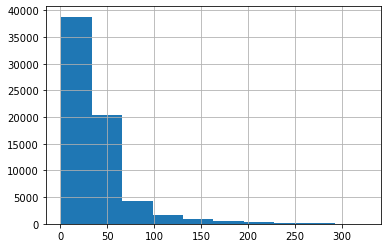

In [7]:
#
lens = reviews.review.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english'))
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(reviews.review)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

,0
work,60254
good,41557
company,23308
management,18562
great,17891
working,15970
place,14654
job,14293
team,13426
environment,11316


In [19]:
#bi-gram term ferquency
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(reviews.review)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

,0
place work,7705
work life,6926
life balance,6463
good work,4465
part job,4301
work culture,4300
co workers,4144
good place,3799
good company,3503
work environment,3170


In [51]:
from textblob import TextBlob
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
reviews['review'] = preprocess(reviews['review'])
#Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] 
#where 1 means positive sentiment and -1 means a negative sentiment.
reviews['polarity'] = reviews['review'].map(lambda text: TextBlob(text).sentiment.polarity)
#Create new feature for the length of the review
reviews['review_len'] = reviews['review'].astype(str).apply(len)
#Create new feature for the word count of the review
reviews['word_count'] = reviews['review'].apply(lambda x: len(str(x).split()))

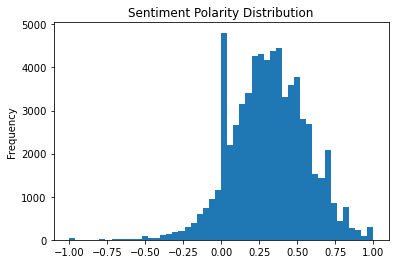

In [39]:
reviews['polarity'].plot(
    kind='hist',
    bins=50,
    title='Sentiment Polarity Distribution')

In [60]:
#polarity average pre industry
reviews.groupby('industry').mean()[['polarity']]

,polarity
industry,
IT_services,0.327374
accounting,0.289644
automotive,0.284091
computer_software,0.307809
construction,0.259709
education_management,0.252978
financial,0.305083
higher_ed,0.298208
hospital_care,0.287751


In [61]:
#review length average per industry
reviews.groupby('industry').mean()[['review_len']]

,review_len
industry,
IT_services,228.159842
accounting,277.637136
automotive,249.049814
computer_software,259.779514
construction,284.266487
education_management,286.852679
financial,255.007236
higher_ed,257.812147
hospital_care,255.120550


In [106]:
reviews.groupby(['industry',reviews.date.dt.year]).mean()[['polarity']]

polarity
industry    date          
IT_services 2011  0.405508
            2012  0.298447
            2013  0.320407
            2014  0.337942
            2015  0.334899
...                    ...
retail      2016  0.324125
            2017  0.293315
            2018  0.279966
            2019  0.284821
            2020  0.301780

[98 rows x 1 columns]

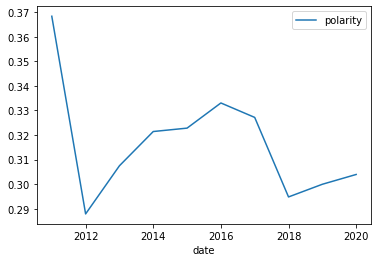

In [111]:
reviews.groupby([reviews.date.dt.year]).mean()[['polarity']].plot()

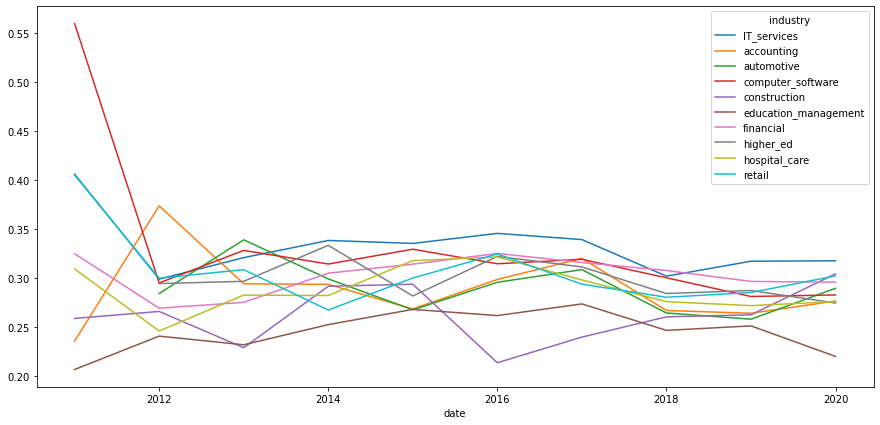

In [115]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
reviews.groupby([reviews.date.dt.year,'industry']).mean()['polarity'].unstack().plot(ax=ax)

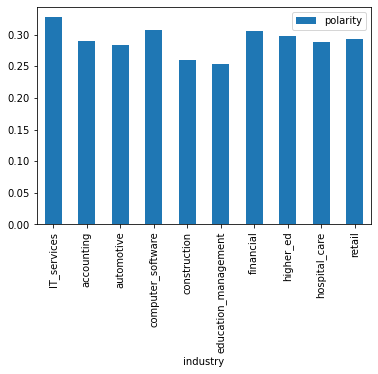

In [109]:
reviews.groupby(['industry']).mean()[['polarity']].plot(kind='bar')

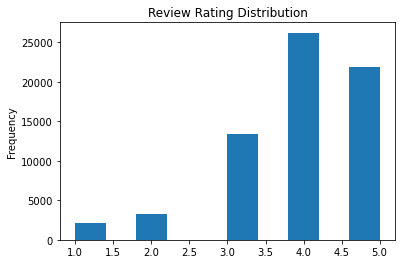

In [91]:
reviews['rating'].plot(
    kind='hist',
    title='Review Rating Distribution')

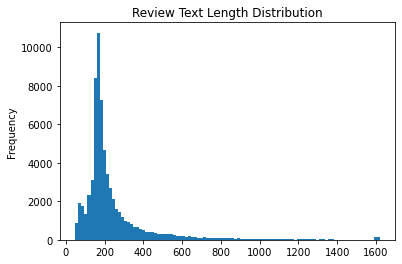

In [94]:
reviews['review_len'].plot(
    kind='hist',
    bins=100,
    title='Review Text Length Distribution')

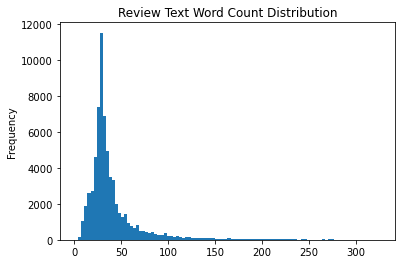

In [95]:
reviews['word_count'].plot(
    kind='hist',
    bins=100,
    title='Review Text Word Count Distribution')

and 102845
the 100058
to 95744
work 60254
is 51910
of 50722
good 41557
in 41342
for 34477
with 33898
was 26664
it 24087
you 23586
company 23308
are 23029
very 20805
my 19272
on 18783
management 18562
as 17972


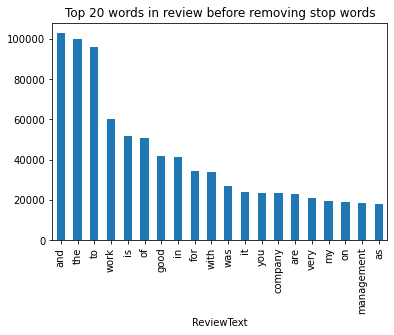

In [97]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before removing stop words')

work 60254
good 41557
company 23308
management 18562
great 17891
working 15970
place 14654
job 14293
team 13426
environment 11316
people 10806
culture 10101
new 10009
life 9770
lot 9601
time 9340
learn 9127
experience 7689
day 7583
balance 7551


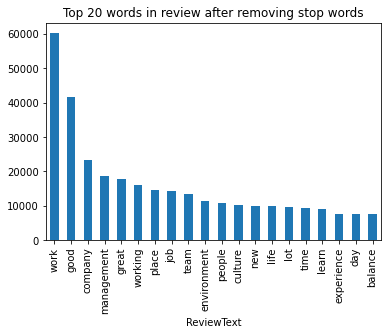

In [100]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')


to work 21375
of the 11337
place to 10104
in the 7043
work life 6574
life balance 6452
part of 6155
to learn 6012
the company 5923
is good 5638
lot of 5481
work with 5448
very good 4951
the job 4936
it is 4545
is very 4492
to be 4417
work culture 4227
co workers 4144
the work 4092


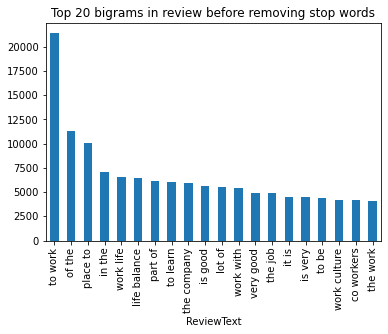

In [98]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review before removing stop words')


place work 7734
work life 6934
life balance 6465
good work 4537
work culture 4304
good place 3799
good company 3535
company work 3179
work environment 3177
great place 3076
hardest job 2224
learn new 2088
typical day 2048
management good 1911
learned lot 1843
new technologies 1795
work good 1732
job security 1705
culture good 1657
enjoyable job 1643


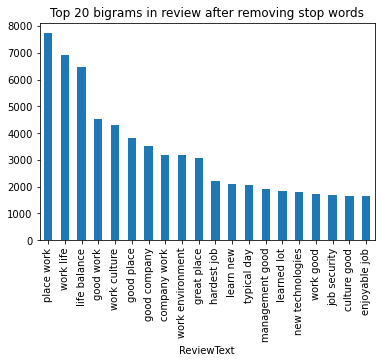

In [101]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')
